# Donor Detector

We would like to build a machine learning model to predict the political party(Republican and Democratic Party) which each fundraiser would choose in political campaigns.

**Analysis of the 2023 donation records**

In [1]:
# Read the file
import pandas as pd
df = pd.read_csv('df_2023_treat party_no_names.csv') 

/var/folders/l2/hphl0w2x79nd9wc7w4t18t380000gn/T/ipykernel_85691/4184042506.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_2023_treat party_no_names.csv')


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df.head()

,CMTE_ID,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,party_full,party_label
0,C00806752,LAS VEGAS,NV,89107,NaN,NaN,4052022,580,REPUBLICAN PARTY,0
1,C00806752,LAS VEGAS,NV,89148,NaN,NaN,4102022,350,REPUBLICAN PARTY,0
2,C00806752,LAS VEGAS,NV,89107,NONE,RETIRED,4112022,480,REPUBLICAN PARTY,0
3,C00806752,LAS VEGAS,NV,89110,NONE,RETIRED,6302022,7709,REPUBLICAN PARTY,0
4,C00806372,PROVIDENCE,RI,029033050,NOT EMPLOYED,NOT EMPLOYED,1112023,64427,DEMOCRATIC PARTY,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6653441 entries, 0 to 6653440
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   CMTE_ID          object
 1   CITY             object
 2   STATE            object
 3   ZIP_CODE         object
 4   EMPLOYER         object
 5   OCCUPATION       object
 6   TRANSACTION_DT   int64 
 7   TRANSACTION_AMT  int64 
 8   party_full       object
 9   party_label      int64 
dtypes: int64(3), object(7)
memory usage: 507.6+ MB


In [5]:
df.isnull().sum()

CMTE_ID                 0
CITY                  292
STATE                2423
ZIP_CODE             8275
EMPLOYER           551570
OCCUPATION         218535
TRANSACTION_DT          0
TRANSACTION_AMT         0
party_full              0
party_label             0
dtype: int64

# 1. Data Cleaning

1. Convert STATE to numerical values
2. Convert CITY to numerical values
3. Convert EMPLOYER to numerical values
4. Convert OCCUPATION to numerical values

**1.1 Convert STATE to numerical values**

In [6]:
# Create a dictionary to map unique states to numbers using enumerate
state_mapping = {state: number for number, state in enumerate(df['STATE'].unique(), start=1)}

# Map the "State" column to numbers
df['State_num'] = df['STATE'].map(state_mapping)

In [7]:
df.head()

,CMTE_ID,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,party_full,party_label,State_num
0,C00806752,LAS VEGAS,NV,89107,NaN,NaN,4052022,580,REPUBLICAN PARTY,0,1
1,C00806752,LAS VEGAS,NV,89148,NaN,NaN,4102022,350,REPUBLICAN PARTY,0,1
2,C00806752,LAS VEGAS,NV,89107,NONE,RETIRED,4112022,480,REPUBLICAN PARTY,0,1
3,C00806752,LAS VEGAS,NV,89110,NONE,RETIRED,6302022,7709,REPUBLICAN PARTY,0,1
4,C00806372,PROVIDENCE,RI,029033050,NOT EMPLOYED,NOT EMPLOYED,1112023,64427,DEMOCRATIC PARTY,1,2


**1.2 Convert CITY to numerical values**

Based on their population: Large cities population > 25,000; 25,000 > middle cities > 10,000, small cities < 10,000 (Census data)

In [8]:
df['CITY'].value_counts()

NEW YORK               112703
WASHINGTON              62135
LOS ANGELES             57928
HOUSTON                 57896
SAN FRANCISCO           45994
                        ...  
FALLA CHURCH                1
MINERAL SPRINGS             1
LAWENCEVILLE                1
MT. SIDNEY                  1
VIENNA 1140 AUSTRIA         1
Name: CITY, Length: 20829, dtype: int64

In [9]:
# Brooklyn belongs to New York, and several city names with "city", which need to remove to match
#the citypopulation data

df['CITY'] = df['CITY'].replace('BROOKLYN', 'NEW YORK')
df['CITY'] = df['CITY'].astype(str).str.replace('CITY', '', case=False)

In [12]:
city_mapping = {city: number for number, city in enumerate(df['CITY'].unique(), start=1)}

df['CITY_num'] = df['CITY'].map(city_mapping)

In [13]:
df.head(10)

,CMTE_ID,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,party_full,party_label,State_num,CITY_num
0,C00806752,LAS VEGAS,NV,89107,NaN,NaN,4052022,580,REPUBLICAN PARTY,0,1,1
1,C00806752,LAS VEGAS,NV,89148,NaN,NaN,4102022,350,REPUBLICAN PARTY,0,1,1
2,C00806752,LAS VEGAS,NV,89107,NONE,RETIRED,4112022,480,REPUBLICAN PARTY,0,1,1
3,C00806752,LAS VEGAS,NV,89110,NONE,RETIRED,6302022,7709,REPUBLICAN PARTY,0,1,1
4,C00806372,PROVIDENCE,RI,029033050,NOT EMPLOYED,NOT EMPLOYED,1112023,64427,DEMOCRATIC PARTY,1,2,2
5,C00796540,NEW YORK,NY,112012170,NaN,NaN,1102023,800,DEMOCRATIC PARTY,1,3,3
6,C00796540,NEW YORK,NY,112012129,NaN,NaN,1102023,800,DEMOCRATIC PARTY,1,3,3
7,C00796540,TAKOMA PARK,MD,209124128,NaN,NaN,1052023,1000,DEMOCRATIC PARTY,1,4,4
8,C00796540,NEW YORK,NY,100280139,NaN,NaN,1052023,1000,DEMOCRATIC PARTY,1,3,3
9,C00765560,DARNESTOWN,MD,20874,NaN,NaN,10192022,2800,DEMOCRATIC PARTY,1,4,5


**1.3 Convert EMPLOYER to numerical values**

In [14]:
df['EMPLOYER'].value_counts()

RETIRED               2059977
NOT EMPLOYED          1617444
NONE                   336139
SELF-EMPLOYED          185461
SELF                   169464
                       ...   
K12INC                      1
ABAWS MANAGMENT             1
KW CURTON CONTROLS          1
KRIEF DEVAULT LLP           1
VINCENZO ?S                 1
Name: EMPLOYER, Length: 195917, dtype: int64

In [23]:
#combine "SELF_EMPLOYED", "SELF", "SELF EMPLOYED"  together as "Self-Emplyed"
#combine "NOT EMPLOYED", "NOT-EMPLOYED", "UNEMPLOYED  together as "Not-Employed"

df['EMPLOYER'] = df['EMPLOYER'].replace({'SELF-EMPLOYED': 'Self-Employed', 'SELF': 'Self-Employed', 'SELF EMPLOYED': 'Self-Employed'})
df['EMPLOYER'] = df['EMPLOYER'].replace({'NOT EMPLOYED': 'Not-Employed', 'NOT-EMPLOYED': 'Not-Employed', 'UNEMPLOYED': 'Not-Employed'})
df['EMPLOYER'] = df['EMPLOYER'].fillna('others')                                         

In [24]:
df['EMPLOYER'].value_counts()

RETIRED                        2059977
Not-Employed                   1626729
others                          551570
Self-Employed                   433472
NONE                            336139
                                ...   
RICE INSURANCE SERVICES CO.          1
INTERNAL MEDICINE GROUP              1
THE CATES LAW FIRM, LLC              1
PARADISE OCEANFRONT RESORT           1
VINCENZO ?S                          1
Name: EMPLOYER, Length: 195914, dtype: int64

In [18]:
employer_mapping = {employer: number for number, employer in enumerate(df['EMPLOYER'].unique(), start=1)}

df['EMPLOYER_num'] = df['EMPLOYER'].map(employer_mapping)

In [19]:
df.head()

,CMTE_ID,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,party_full,party_label,State_num,CITY_num,EMPLOYER_num
0,C00806752,LAS VEGAS,NV,89107,NaN,NaN,4052022,580,REPUBLICAN PARTY,0,1,1,1
1,C00806752,LAS VEGAS,NV,89148,NaN,NaN,4102022,350,REPUBLICAN PARTY,0,1,1,1
2,C00806752,LAS VEGAS,NV,89107,NONE,RETIRED,4112022,480,REPUBLICAN PARTY,0,1,1,2
3,C00806752,LAS VEGAS,NV,89110,NONE,RETIRED,6302022,7709,REPUBLICAN PARTY,0,1,1,2
4,C00806372,PROVIDENCE,RI,029033050,Not-Employed,NOT EMPLOYED,1112023,64427,DEMOCRATIC PARTY,1,2,2,3


**1.4 Convert OCCUPATION to numerical values**

In [20]:
df['OCCUPATION'].value_counts()

RETIRED                  2408212
NOT EMPLOYED             1904682
ATTORNEY                   96182
PHYSICIAN                  79071
CONSULTANT                 48849
                          ...   
MARKET SALES DIRECTOR          1
ATTORNEY COUNCILMAN            1
SENIOR MGR IT                  1
CRYPTO                         1
ACTUARIAL MANAGER              1
Name: OCCUPATION, Length: 49717, dtype: int64

In [25]:
df['OCCUPATION'] = df['OCCUPATION'].replace({'SELF-EMPLOYED': 'Self-Employed', 'SELF': 'Self-Employed', 'SELF EMPLOYED': 'Self-Employed'})
df['OCCUPATION'] = df['OCCUPATION'].replace({'NOT EMPLOYED': 'Not-Employed', 'NOT-EMPLOYED': 'Not-Employed', 'UNEMPLOYED': 'Not-Employed'})
df['OCCUPATION'] = df['OCCUPATION'].fillna('others')

In [26]:
df.head(15)

,CMTE_ID,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,party_full,party_label,State_num,CITY_num,EMPLOYER_num
0,C00806752,LAS VEGAS,NV,89107,others,others,4052022,580,REPUBLICAN PARTY,0,1,1,1
1,C00806752,LAS VEGAS,NV,89148,others,others,4102022,350,REPUBLICAN PARTY,0,1,1,1
2,C00806752,LAS VEGAS,NV,89107,NONE,RETIRED,4112022,480,REPUBLICAN PARTY,0,1,1,2
3,C00806752,LAS VEGAS,NV,89110,NONE,RETIRED,6302022,7709,REPUBLICAN PARTY,0,1,1,2
4,C00806372,PROVIDENCE,RI,029033050,Not-Employed,Not-Employed,1112023,64427,DEMOCRATIC PARTY,1,2,2,3
5,C00796540,NEW YORK,NY,112012170,others,others,1102023,800,DEMOCRATIC PARTY,1,3,3,1
6,C00796540,NEW YORK,NY,112012129,others,others,1102023,800,DEMOCRATIC PARTY,1,3,3,1
7,C00796540,TAKOMA PARK,MD,209124128,others,others,1052023,1000,DEMOCRATIC PARTY,1,4,4,1
8,C00796540,NEW YORK,NY,100280139,others,others,1052023,1000,DEMOCRATIC PARTY,1,3,3,1
9,C00765560,DARNESTOWN,MD,20874,others,others,10192022,2800,DEMOCRATIC PARTY,1,4,5,1


In [27]:
occupation_mapping = {occupation: number for number, occupation in enumerate(df['OCCUPATION'].unique(), start=1)}

df['OCCUPATION_num'] = df['OCCUPATION'].map(occupation_mapping)

In [28]:
df.head(15)

,CMTE_ID,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,party_full,party_label,State_num,CITY_num,EMPLOYER_num,OCCUPATION_num
0,C00806752,LAS VEGAS,NV,89107,others,others,4052022,580,REPUBLICAN PARTY,0,1,1,1,1
1,C00806752,LAS VEGAS,NV,89148,others,others,4102022,350,REPUBLICAN PARTY,0,1,1,1,1
2,C00806752,LAS VEGAS,NV,89107,NONE,RETIRED,4112022,480,REPUBLICAN PARTY,0,1,1,2,2
3,C00806752,LAS VEGAS,NV,89110,NONE,RETIRED,6302022,7709,REPUBLICAN PARTY,0,1,1,2,2
4,C00806372,PROVIDENCE,RI,029033050,Not-Employed,Not-Employed,1112023,64427,DEMOCRATIC PARTY,1,2,2,3,3
5,C00796540,NEW YORK,NY,112012170,others,others,1102023,800,DEMOCRATIC PARTY,1,3,3,1,1
6,C00796540,NEW YORK,NY,112012129,others,others,1102023,800,DEMOCRATIC PARTY,1,3,3,1,1
7,C00796540,TAKOMA PARK,MD,209124128,others,others,1052023,1000,DEMOCRATIC PARTY,1,4,4,1,1
8,C00796540,NEW YORK,NY,100280139,others,others,1052023,1000,DEMOCRATIC PARTY,1,3,3,1,1
9,C00765560,DARNESTOWN,MD,20874,others,others,10192022,2800,DEMOCRATIC PARTY,1,4,5,1,1


# 2. Exploratory Data Analysis

**2.1 Visualizing quantitative variables Ater cleaning data, we can see now that the datatypes of variables 'party', 'state','city', 'employer',and 'occupation' are transfered to numerical. We will visualize the aforementioned quantitative variables below**

(0.0, 1.0, 0.0, 1.0)

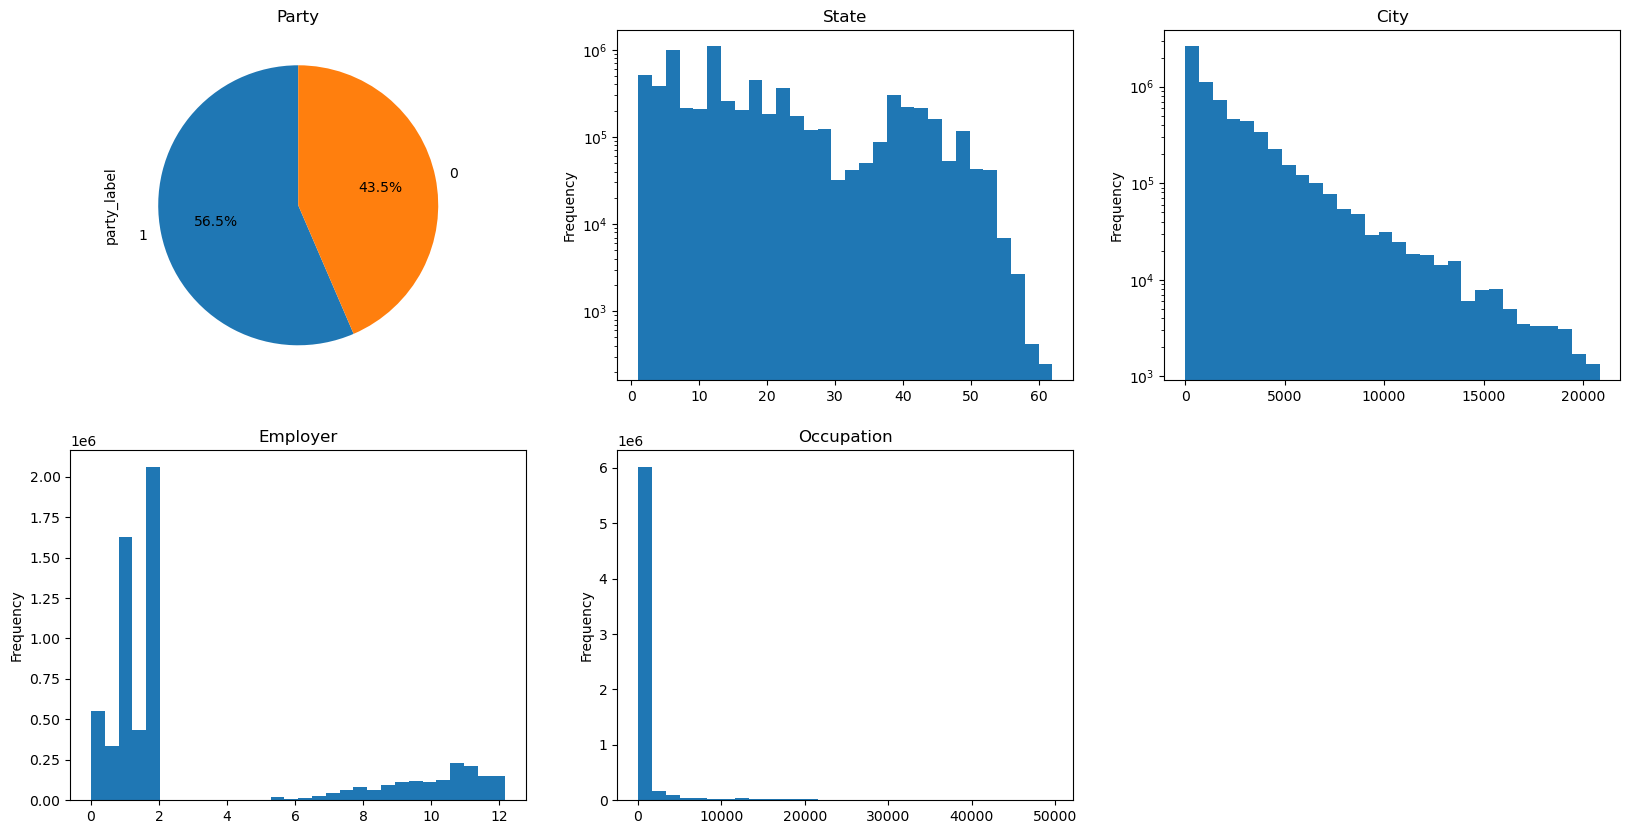

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

# Plot data on the (1,1) subplot
df['party_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[0,0])
axes[0,0].set_title('Party')

#plot data on the (1,2) subplot
df['State_num'].plot(kind='hist', bins=30, log = True, ax=axes[0,1])
axes[0,1].set_title('State')

#plot data on the (1,3) subplot

df['CITY_num'].plot(kind='hist', bins=30, log=True, ax=axes[0, 2])
axes[0, 2].set_title('City')

# Plot data on the (2,1) subplot
df['EMPLOYER_num'].map(np.log
                      ).plot(kind='hist', bins=30, ax=axes[1,0])
axes[1,0].set_title('Employer')

#plot data on the (2,2) subplot
df['OCCUPATION_num'].plot(kind='hist', bins=30, ax=axes[1,1])
axes[1,1].set_title('Occupation')

# Hide the empty subplot at (2,3)
axes[1, 2].axis('off')

**We did nature log transformation on Employer and Occupation due to their large values.**     
The log transformation rescales the variable value range, makes extremely large or sparsed variables to be readable.

**2.2 STATE**

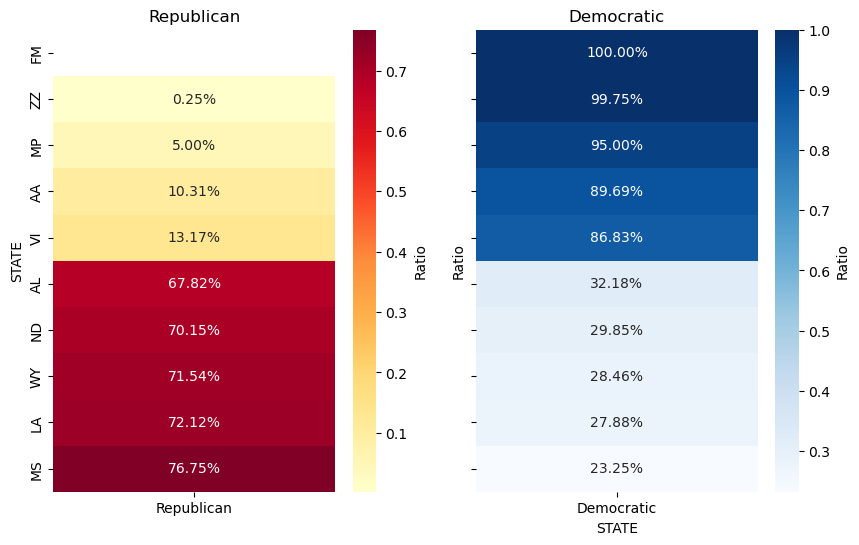

In [83]:
# Rename the columns
selected_rows.columns = ['STATE', 'Republican', 'Democratic']
# Create a figure with two subplots

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Heatmap for Republican with a different colormap
sns.heatmap(selected_rows.set_index('STATE')[['Republican']], annot=True, cmap="YlOrRd", fmt=".2%", cbar_kws={'label': 'Ratio'}, ax=axes[0])
axes[0].set_title('Republican')

# Heatmap for Democratic with a different colormap
sns.heatmap(selected_rows.set_index('STATE')[['Democratic']], annot=True, cmap="Blues", fmt=".2%", cbar_kws={'label': 'Ratio'}, ax=axes[1])
axes[1].set_title('Democratic')

# Adjust labels and layout
plt.xlabel('STATE')
plt.ylabel('Ratio')
plt.show()

**2.2 CITY**

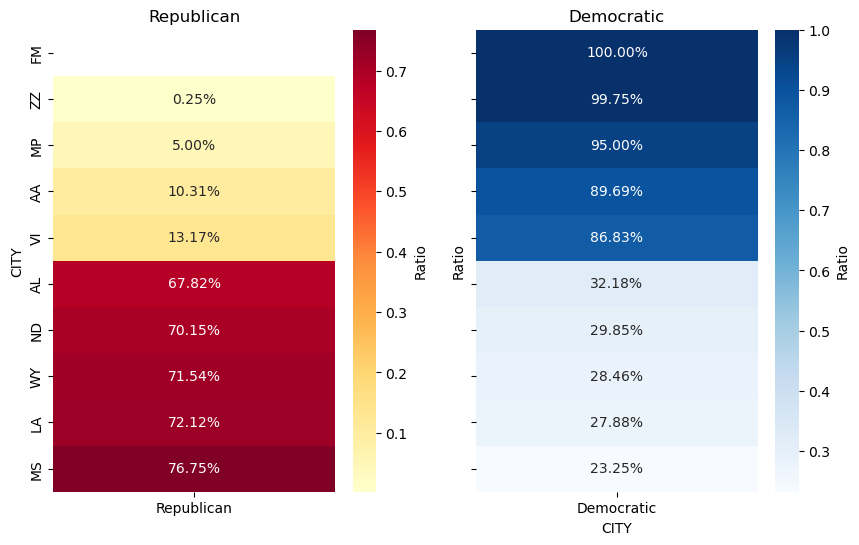

In [84]:
# Rename the columns
selected_rows.columns = ['CITY', 'Republican', 'Democratic']
# Create a figure with two subplots

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Heatmap for Republican with a different colormap
sns.heatmap(selected_rows.set_index('CITY')[['Republican']], annot=True, cmap="YlOrRd", fmt=".2%", cbar_kws={'label': 'Ratio'}, ax=axes[0])
axes[0].set_title('Republican')

# Heatmap for Democratic with a different colormap
sns.heatmap(selected_rows.set_index('CITY')[['Democratic']], annot=True, cmap="Blues", fmt=".2%", cbar_kws={'label': 'Ratio'}, ax=axes[1])
axes[1].set_title('Democratic')

# Adjust labels and layout
plt.xlabel('CITY')
plt.ylabel('Ratio')
plt.show()

**2.3 EMPLOYER**

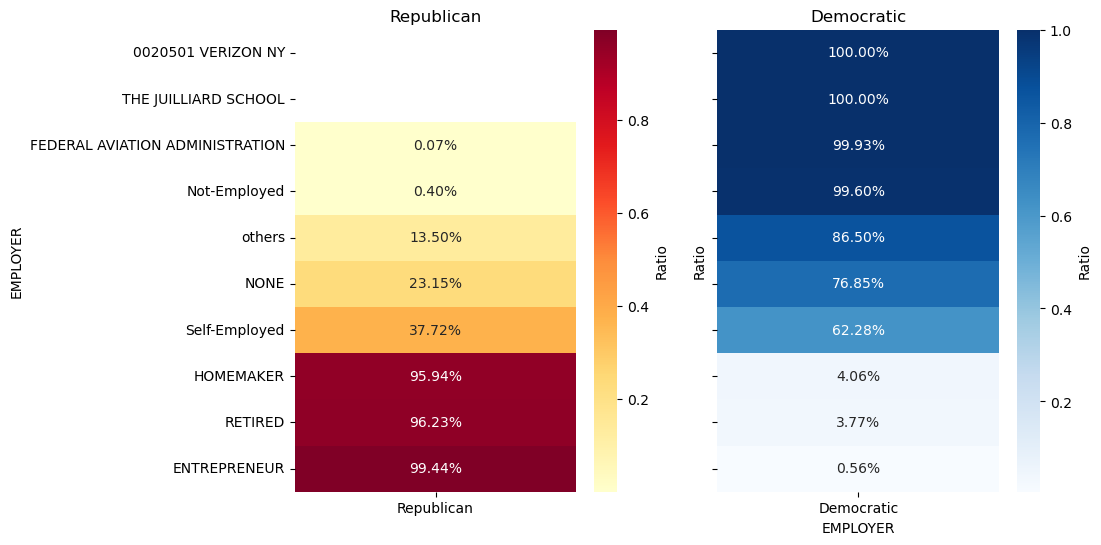

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the frequency of each employer
employer_counts = df['EMPLOYER'].value_counts()

# Select the top 10 most frequent employers
top_employers = employer_counts.head(10).index

# Filter the DataFrame to include only the selected employers
df_selected_employers = df[df['EMPLOYER'].isin(top_employers)]

# Calculate the ratio of each party_label across selected employers
employer_label_ratio = df_selected_employers.groupby(['EMPLOYER', 'party_label']).size() / df_selected_employers.groupby('EMPLOYER').size()

# Convert the result to a DataFrame and reset the index
employer_label_ratio = employer_label_ratio.unstack().reset_index()

# Order the rows based on the ratio of party_label with value 1
employer_label_ratio = employer_label_ratio.sort_values(by=1, ascending=False)

# Rename the columns
employer_label_ratio.columns = ['EMPLOYER', 'Republican', 'Democratic']

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Heatmap for Republican with a different colormap
sns.heatmap(employer_label_ratio.set_index('EMPLOYER')[['Republican']], annot=True, cmap="YlOrRd", fmt=".2%", cbar_kws={'label': 'Ratio'}, ax=axes[0])
axes[0].set_title('Republican')

# Heatmap for Democratic with a different colormap
sns.heatmap(employer_label_ratio.set_index('EMPLOYER')[['Democratic']], annot=True, cmap="Blues", fmt=".2%", cbar_kws={'label': 'Ratio'}, ax=axes[1])
axes[1].set_title('Democratic')

# Adjust labels and layout
plt.xlabel('EMPLOYER')
plt.ylabel('Ratio')
plt.show()

**2.5 OCCUPATION**

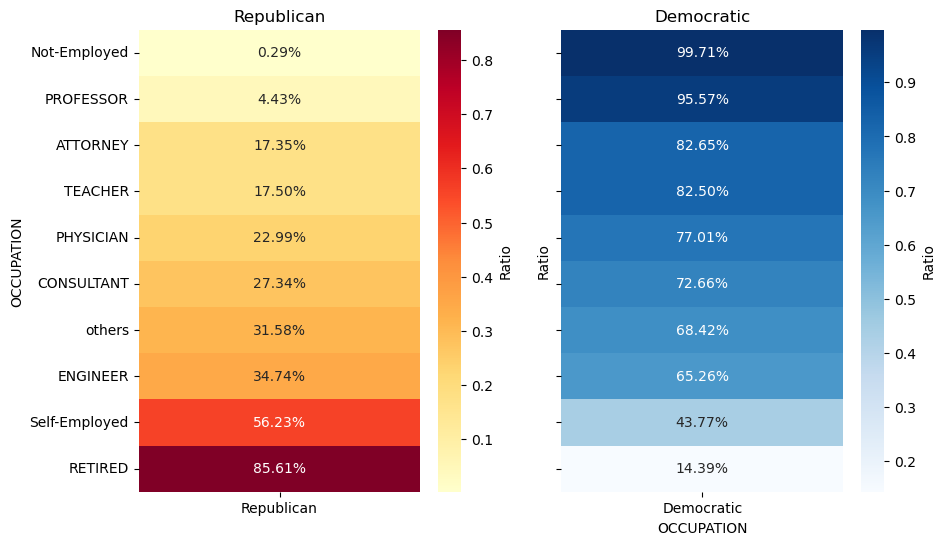

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the frequency of each occupation
occupation_counts = df['OCCUPATION'].value_counts()

# Select the top 10 most frequent occupation
top_occupation = occupation_counts.head(10).index

# Filter the DataFrame to include only the selected occupation
df_selected_occupation = df[df['OCCUPATION'].isin(top_occupation)]

# Calculate the ratio of each party_label across selected occupation
occupation_label_ratio = df_selected_occupation.groupby(['OCCUPATION', 'party_label']).size() / df_selected_occupation.groupby('OCCUPATION').size()

# Convert the result to a DataFrame and reset the index
occupation_label_ratio = occupation_label_ratio.unstack().reset_index()

# Order the rows based on the ratio of party_label with value 1
occupation_label_ratio = occupation_label_ratio.sort_values(by=1, ascending=False)

# Rename the columns
occupation_label_ratio.columns = ['OCCUPATION', 'Republican', 'Democratic']

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Heatmap for Republican with a different colormap
sns.heatmap(occupation_label_ratio.set_index('OCCUPATION')[['Republican']], annot=True, cmap="YlOrRd", fmt=".2%", cbar_kws={'label': 'Ratio'}, ax=axes[0])
axes[0].set_title('Republican')

# Heatmap for Democratic with a different colormap
sns.heatmap(occupation_label_ratio.set_index('OCCUPATION')[['Democratic']], annot=True, cmap="Blues", fmt=".2%", cbar_kws={'label': 'Ratio'}, ax=axes[1])
axes[1].set_title('Democratic')

# Adjust labels and layout
plt.xlabel('OCCUPATION')
plt.ylabel('Ratio')
plt.show()

**3.4 We observe the correlation between numercical features and target**

In [44]:
df_numerical = pd.DataFrame()
df_numerical.loc[:, :] = 0
df_numerical = df[['State_num', 'CITY_num', 'EMPLOYER_num', 'OCCUPATION_num', 'party_label']]
df_numerical.head()

,State_num,CITY_num,EMPLOYER_num,OCCUPATION_num,party_label
0,1,1,1,1,0
1,1,1,1,1,0
2,1,1,2,2,0
3,1,1,2,2,0
4,2,2,3,3,1


In [45]:
df_numerical_corr = df_numerical.corr(method = 'pearson')
df_numerical_corr

,State_num,CITY_num,EMPLOYER_num,OCCUPATION_num,party_label
State_num,1.000000,0.150103,-0.021576,-0.012365,-0.040678
CITY_num,0.150103,1.000000,0.006060,0.008678,-0.053371
EMPLOYER_num,-0.021576,0.006060,1.000000,0.325154,0.036837
OCCUPATION_num,-0.012365,0.008678,0.325154,1.000000,0.024304
party_label,-0.040678,-0.053371,0.036837,0.024304,1.000000


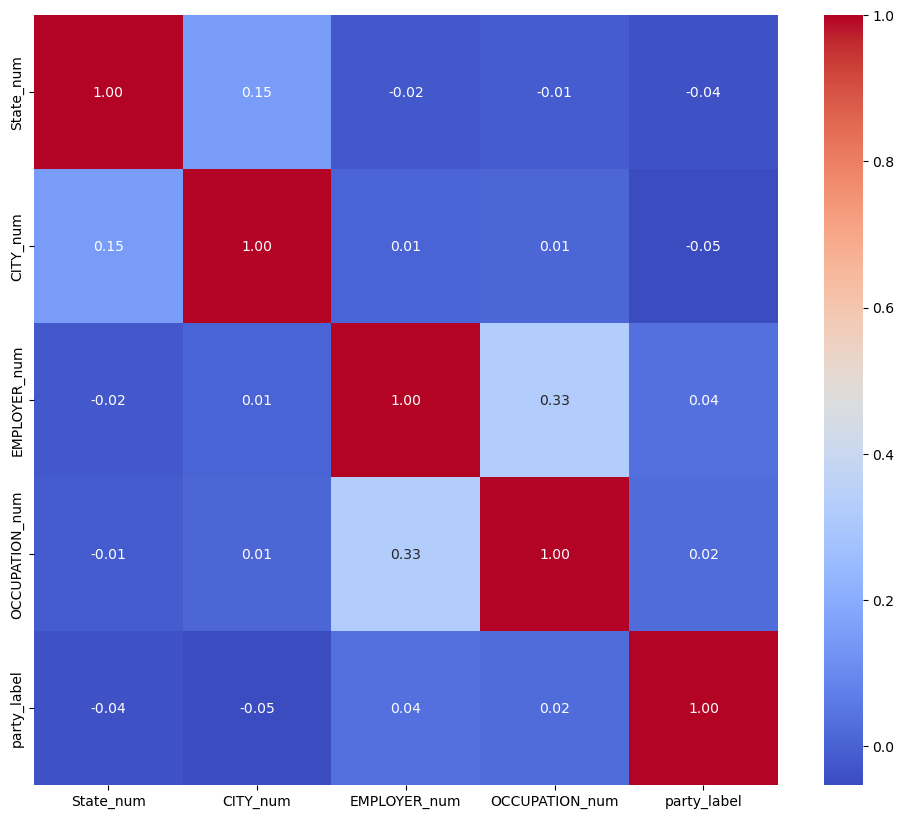

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_numerical is your numerical DataFrame
plt.figure(figsize=(12, 10))  # Set the figure size (width, height)
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Customize the heatmap as needed

# Show the plot
plt.show()

In [47]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6653441 entries, 0 to 6653440
Data columns (total 5 columns):
 #   Column          Dtype
---  ------          -----
 0   State_num       int64
 1   CITY_num        int64
 2   EMPLOYER_num    int64
 3   OCCUPATION_num  int64
 4   party_label     int64
dtypes: int64(5)
memory usage: 253.8 MB


# 4.Handling Missing Values (Feature)

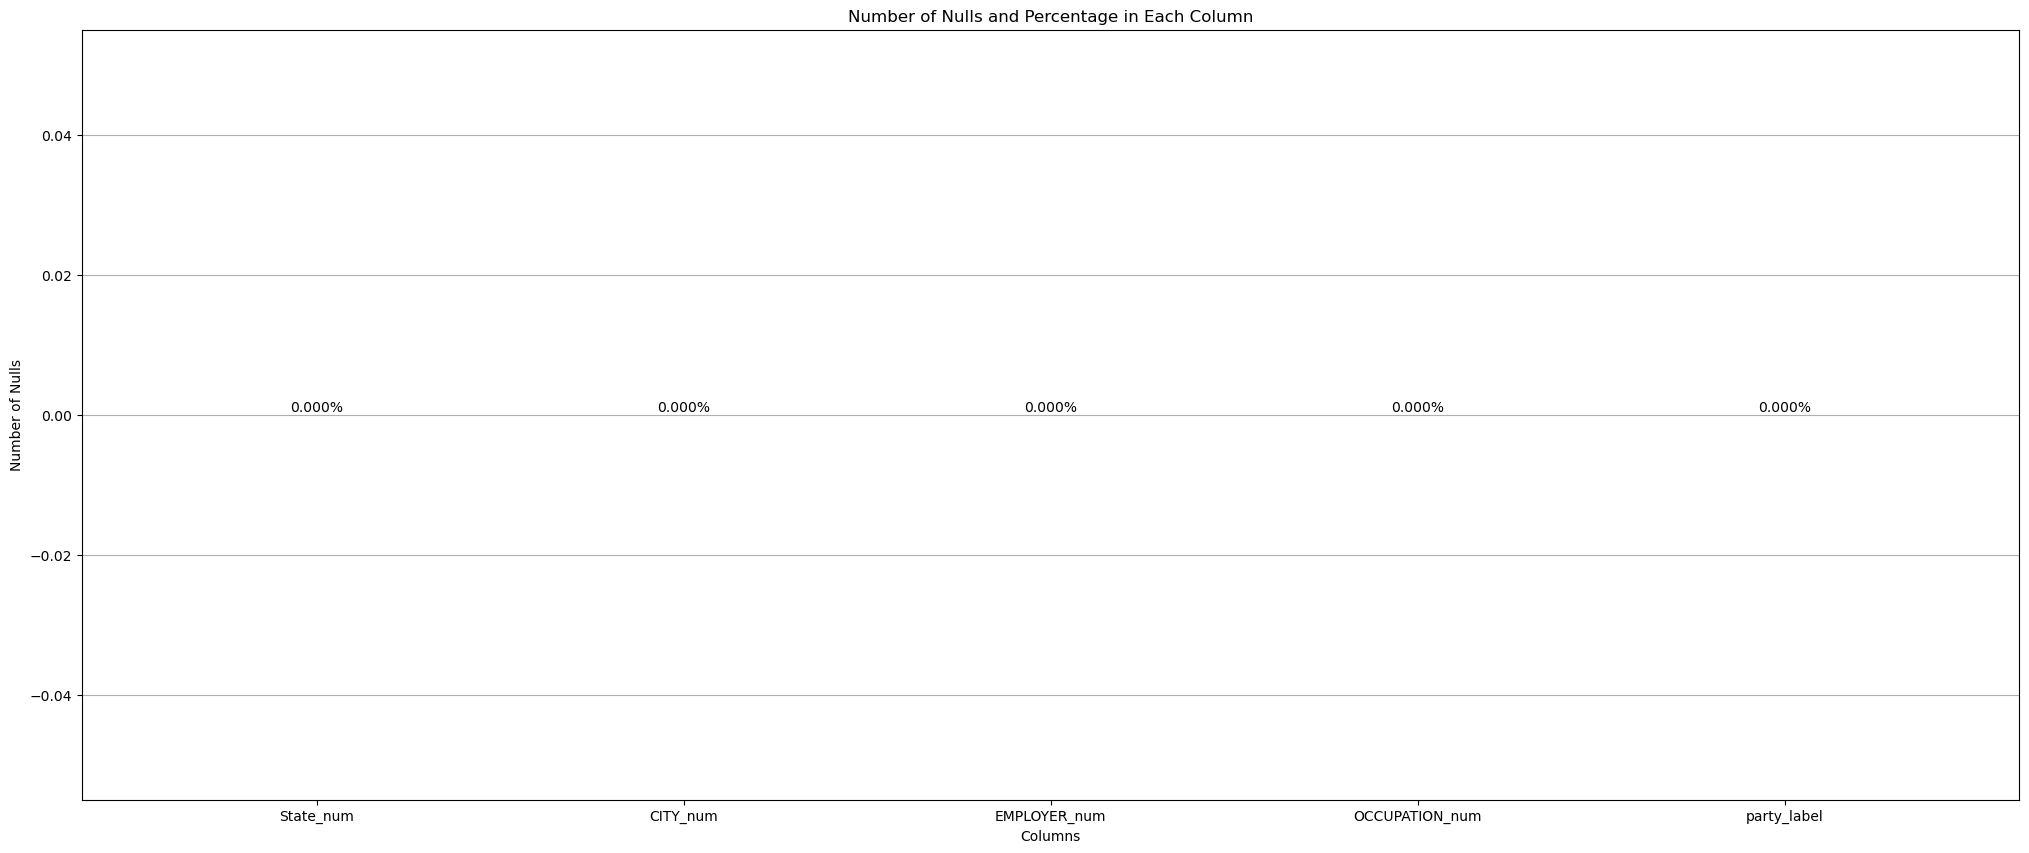

In [48]:
# Calculate the number of nulls and the percentage of nulls for each column
null_counts = df_numerical.isnull().sum()
null_percentage = (df_numerical.isnull().mean() * 100)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(25,10))

# Plot number of nulls
bars = ax.bar(null_counts.index, null_counts, color='blue')

# Add percentage labels to each bar
for bar, percentage in zip(bars, null_percentage):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height, f'{percentage:.3f}%', ha='center', va='bottom')

# Set labels and title
ax.set_ylabel('Number of Nulls')
ax.set_xlabel('Columns')
ax.set_title('Number of Nulls and Percentage in Each Column')

# Add gridlines for better readability
ax.yaxis.grid(True)

# Show the plot
plt.show()

In [49]:
df_numerical.isna().sum()

State_num         0
CITY_num          0
EMPLOYER_num      0
OCCUPATION_num    0
party_label       0
dtype: int64

**Split into train and test data**

In [50]:
from sklearn.model_selection import train_test_split

train_raw, test_raw = train_test_split(df_numerical, test_size = 0.2, shuffle=False)

In [51]:
features = list(train_raw.columns)
target = 'party_label'
features.remove(target)

In [52]:
X_train = train_raw[features]
y_train = train_raw[target]

X_test = test_raw[features]
y_test = test_raw[target]

In [53]:
train_raw

,State_num,CITY_num,EMPLOYER_num,OCCUPATION_num,party_label
0,1,1,1,1,0
1,1,1,1,1,0
2,1,1,2,2,0
3,1,1,2,2,0
4,2,2,3,3,1
...,...,...,...,...,...
5322747,39,3655,157349,545,1
5322748,45,770,3,3,1
5322749,12,17,5,318,1
5322750,28,779,1,3,1


In [54]:
X_train

,State_num,CITY_num,EMPLOYER_num,OCCUPATION_num
0,1,1,1,1
1,1,1,1,1
2,1,1,2,2
3,1,1,2,2
4,2,2,3,3
...,...,...,...,...
5322747,39,3655,157349,545
5322748,45,770,3,3
5322749,12,17,5,318
5322750,28,779,1,3


In [55]:
X_train.columns

Index(['State_num', 'CITY_num', 'EMPLOYER_num', 'OCCUPATION_num'], dtype='object')

# 5. Model selection

**5.1 LogisticRegression**

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, average_precision_score, precision_score, classification_report, confusion_matrix, roc_auc_score

# Initializing and training a Logistic Regression model
steps_lg = [('rescale', MinMaxScaler()),
         ('logr', LogisticRegression(random_state=42))]
model_lg = Pipeline(steps_lg)
model_lg = model_lg.fit(X_train, y_train)  # Assuming X_train is your training data

y_train_pred = model_lg.predict(X_train)
y_test_pred = model_lg.predict(X_test)

# Calculate metrics
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

classification_report_train = classification_report(y_train, y_train_pred)
classification_report_test = classification_report(y_test, y_test_pred)

confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

roc_auc_train = roc_auc_score(y_train, model_lg.predict_proba(X_train)[:, 1])
roc_auc_test = roc_auc_score(y_test, model_lg.predict_proba(X_test)[:, 1])

pr_auc_train = average_precision_score(y_train, model_lg.predict_proba(X_train)[:, 1])
pr_auc_test = average_precision_score(y_test, model_lg.predict_proba(X_test)[:, 1])

# Printing the metrics
print(f'Precision_test: {precision_test}')
print(f'Precision_train: {precision_train}')
print(f'Accuracy_test: {accuracy_test}')
print(f'Accuracy_train: {accuracy_train}')
print('Classification Report_test:\n', classification_report_test)
print('Classification Report_train:\n', classification_report_train)
print('Confusion Matrix_test:\n', confusion_matrix_test)
print('Confusion Matrix_train:\n', confusion_matrix_train)
print(f'ROC AUC Score_test: {roc_auc_test}')
print(f'ROC AUC Score_train: {roc_auc_train}')
print(f'PR AUC Score_test: {pr_auc_test}')
print(f'PR AUC Score_train: {pr_auc_train}')

Precision_test: 0.5492897447533586
Precision_train: 0.5709728444930244
Accuracy_test: 0.5495453858865595
Accuracy_train: 0.5672800461114852
Classification Report_test:
               precision    recall  f1-score   support

           0       0.56      0.04      0.08    604631
           1       0.55      0.97      0.70    726058

    accuracy                           0.55   1330689
   macro avg       0.55      0.51      0.39   1330689
weighted avg       0.55      0.55      0.42   1330689

Classification Report_train:
               precision    recall  f1-score   support

           0       0.47      0.04      0.07   2291094
           1       0.57      0.97      0.72   3031658

    accuracy                           0.57   5322752
   macro avg       0.52      0.50      0.39   5322752
weighted avg       0.53      0.57      0.44   5322752

Confusion Matrix_test:
 [[ 25613 579018]
 [ 20397 705661]]
Confusion Matrix_train:
 [[  89533 2201561]
 [ 101700 2929958]]
ROC AUC Score_test: 0.55

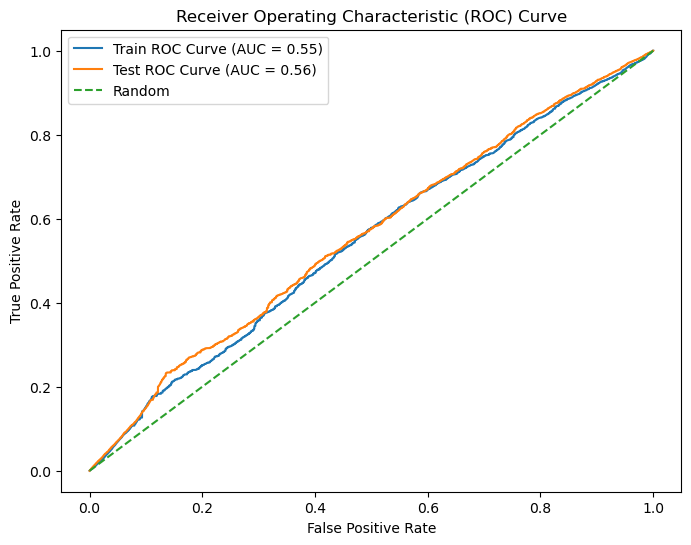

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for train and test sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, model_lg.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, model_lg.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = {:.2f})'.format(auc(fpr_train, tpr_train)))
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = {:.2f})'.format(auc(fpr_test, tpr_test)))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

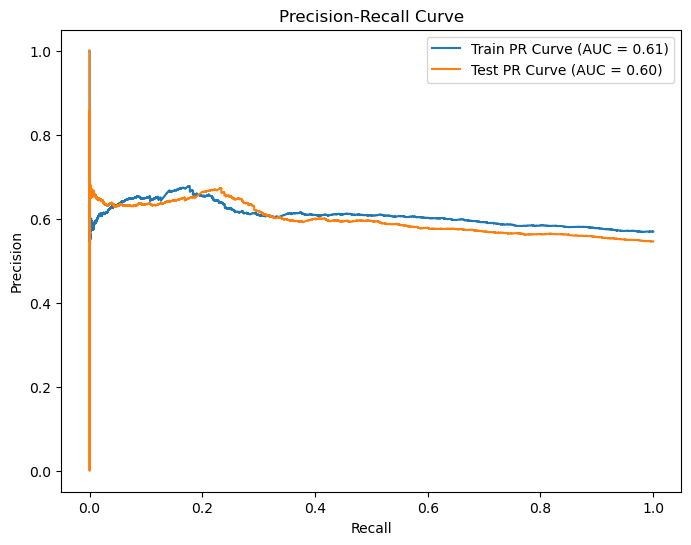

In [58]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Compute Precision-Recall curve for train and test sets
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, model_lg.predict_proba(X_train)[:, 1])
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, model_lg.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_train, precision_train, label='Train PR Curve (AUC = {:.2f})'.format(auc(recall_train, precision_train)))
plt.plot(recall_test, precision_test, label='Test PR Curve (AUC = {:.2f})'.format(auc(recall_test, precision_test)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [59]:
coefficients = model_lg.steps[1][1].coef_[0]
coefficients

array([-0.30115047, -0.70029204,  0.34505204,  0.2576623 ])

**Random Forest**

In [60]:
from sklearn.ensemble import RandomForestClassifier

steps_rf = [('rescale', MinMaxScaler()),
            ('rf', RandomForestClassifier(random_state=42))]
model_rf = Pipeline(steps_rf)
model_rf.fit(X_train, y_train)

# Make predictions on train and test sets
y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

# Calculate metrics
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

classification_report_train = classification_report(y_train, y_train_pred)
classification_report_test = classification_report(y_test, y_test_pred)

confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

roc_auc_train = roc_auc_score(y_train, model_rf.predict_proba(X_train)[:, 1])
roc_auc_test = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])

pr_auc_train = average_precision_score(y_train, model_rf.predict_proba(X_train)[:, 1])
pr_auc_test = average_precision_score(y_test, model_rf.predict_proba(X_test)[:, 1])

# Printing the metrics
print(f'Precision_test: {precision_test}')
print(f'Precision_train: {precision_train}')
print(f'Accuracy_test: {accuracy_test}')
print(f'Accuracy_train: {accuracy_train}')
print('Classification Report_test:\n', classification_report_test)
print('Classification Report_train:\n', classification_report_train)
print('Confusion Matrix_test:\n', confusion_matrix_test)
print('Confusion Matrix_train:\n', confusion_matrix_train)
print(f'ROC AUC Score_test: {roc_auc_test}')
print(f'ROC AUC Score_train: {roc_auc_train}')
print(f'PR AUC Score_test: {pr_auc_test}')
print(f'PR AUC Score_train: {pr_auc_train}')

Precision_test: 0.9288624405878195
Precision_train: 0.9867459287728341
Accuracy_test: 0.9386535847218997
Accuracy_train: 0.9821584774191997
Classification Report_test:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93    604631
           1       0.93      0.96      0.94    726058

    accuracy                           0.94   1330689
   macro avg       0.94      0.94      0.94   1330689
weighted avg       0.94      0.94      0.94   1330689

Classification Report_train:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98   2291094
           1       0.99      0.98      0.98   3031658

    accuracy                           0.98   5322752
   macro avg       0.98      0.98      0.98   5322752
weighted avg       0.98      0.98      0.98   5322752

Confusion Matrix_test:
 [[551184  53447]
 [ 28186 697872]]
Confusion Matrix_train:
 [[2251111   39983]
 [  54983 2976675]]
ROC AUC Score_test: 0.98

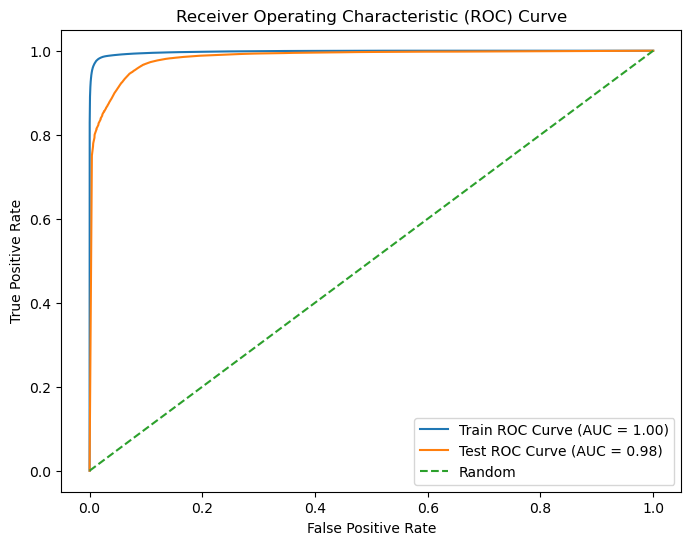

In [61]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for train and test sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, model_rf.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = {:.2f})'.format(auc(fpr_train, tpr_train)))
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = {:.2f})'.format(auc(fpr_test, tpr_test)))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

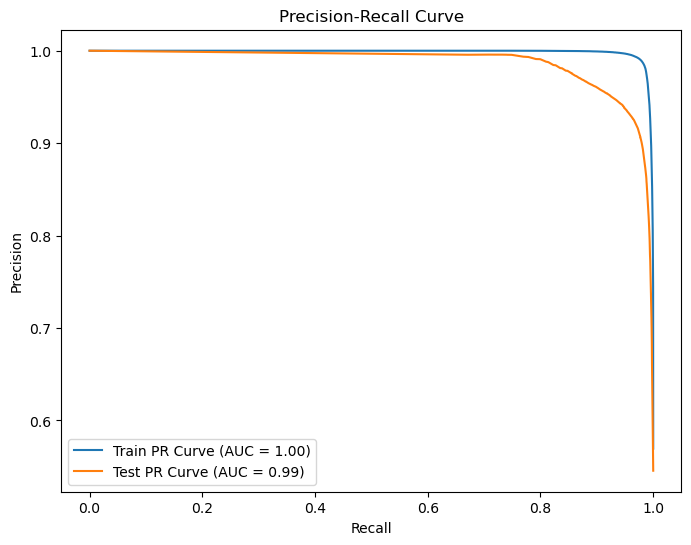

In [62]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Compute Precision-Recall curve for train and test sets
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, model_rf.predict_proba(X_train)[:, 1])
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, model_rf.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_train, precision_train, label='Train PR Curve (AUC = {:.2f})'.format(auc(recall_train, precision_train)))
plt.plot(recall_test, precision_test, label='Test PR Curve (AUC = {:.2f})'.format(auc(recall_test, precision_test)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

[0.0507828  0.10491975 0.44769922 0.39659824]


([<matplotlib.axis.XTick at 0x1932addd0>,
 [Text(0, 0, 'State_Num'),
  Text(1, 0, 'City_Num'),
  Text(2, 0, 'EMPLOYER_num'),
  Text(3, 0, 'OCCUPATION_num')])

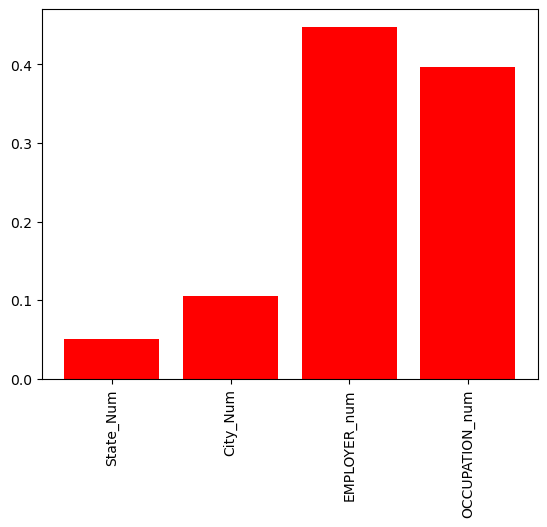

In [63]:
importances_rf = model_rf.steps[1][1].feature_importances_
print(importances_rf)

plt.bar(range(len(importances_rf)), importances_rf, color="r", align = "center")
plt.xticks(range(len(importances_rf)), ['State_Num', 'City_Num', 'EMPLOYER_num', 'OCCUPATION_num'], rotation = 90)

**XGBoost**

In [64]:
from xgboost.sklearn import XGBClassifier

steps_xg = [('Rescale', MinMaxScaler()),
            ('xgbr', XGBClassifier(random_state=42))]
model_xg = Pipeline(steps_xg)
model_xg.fit(X_train, y_train)

# Make predictions on train and test sets
y_train_pred = model_xg.predict(X_train)
y_test_pred = model_xg.predict(X_test)


# Calculate metrics
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

classification_report_train = classification_report(y_train, y_train_pred)
classification_report_test = classification_report(y_test, y_test_pred)

confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

roc_auc_train = roc_auc_score(y_train, model_xg.predict_proba(X_train)[:, 1])
roc_auc_test = roc_auc_score(y_test, model_xg.predict_proba(X_test)[:, 1])

pr_auc_train = average_precision_score(y_train, model_xg.predict_proba(X_train)[:, 1])
pr_auc_test = average_precision_score(y_test, model_xg.predict_proba(X_test)[:, 1])

# Printing the metrics
print(f'Precision_test: {precision_test}')
print(f'Precision_train: {precision_train}')
print(f'Accuracy_test: {accuracy_test}')
print(f'Accuracy_train: {accuracy_train}')
print('Classification Report_test:\n', classification_report_test)
print('Classification Report_train:\n', classification_report_train)
print('Confusion Matrix_test:\n', confusion_matrix_test)
print('Confusion Matrix_train:\n', confusion_matrix_train)
print(f'ROC AUC Score_test: {roc_auc_test}')
print(f'ROC AUC Score_train: {roc_auc_train}')
print(f'PR AUC Score_test: {pr_auc_test}')
print(f'PR AUC Score_train: {pr_auc_train}')

Precision_test: 0.8989616748383573
Precision_train: 0.9230616766708295
Accuracy_test: 0.8979513620387634
Accuracy_train: 0.9236780146811273
Classification Report_test:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89    604631
           1       0.90      0.92      0.91    726058

    accuracy                           0.90   1330689
   macro avg       0.90      0.90      0.90   1330689
weighted avg       0.90      0.90      0.90   1330689

Classification Report_train:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91   2291094
           1       0.92      0.94      0.93   3031658

    accuracy                           0.92   5322752
   macro avg       0.92      0.92      0.92   5322752
weighted avg       0.92      0.92      0.92   5322752

Confusion Matrix_test:
 [[529888  74743]
 [ 61052 665006]]
Confusion Matrix_train:
 [[2052364  238730]
 [ 167513 2864145]]
ROC AUC Score_test: 0.96

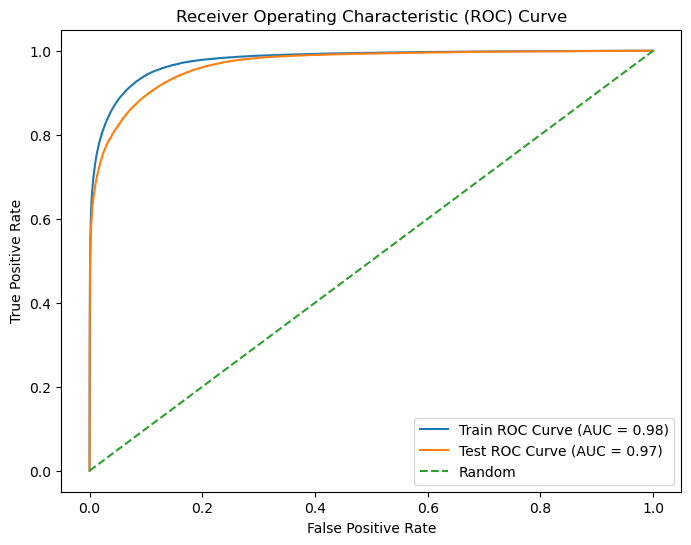

In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for train and test sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, model_xg.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, model_xg.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = {:.2f})'.format(auc(fpr_train, tpr_train)))
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = {:.2f})'.format(auc(fpr_test, tpr_test)))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

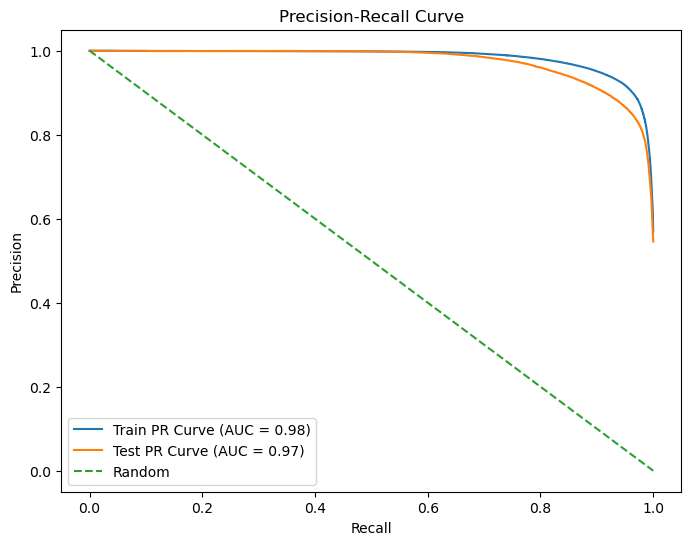

In [66]:
# Compute Precision-Recall curve for train and test sets
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, model_xg.predict_proba(X_train)[:, 1])
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, model_xg.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_train, precision_train, label='Train PR Curve (AUC = {:.2f})'.format(auc(recall_train, precision_train)))
plt.plot(recall_test, precision_test, label='Test PR Curve (AUC = {:.2f})'.format(auc(recall_test, precision_test)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

[0.05128276 0.03808257 0.4123047  0.49833   ]


([<matplotlib.axis.XTick at 0x194821450>,
 [Text(0, 0, 'State_Num'),
  Text(1, 0, 'City_Num'),
  Text(2, 0, 'EMPLOYER_num'),
  Text(3, 0, 'OCCUPATION_num')])

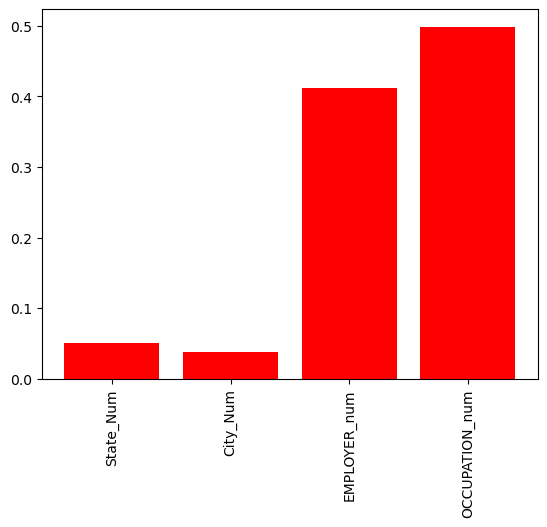

In [67]:
import matplotlib.pylab as plt

importances_xg = model_xg.steps[1][1].feature_importances_
print(importances_xg)

plt.bar(range(len(importances_xg)), importances_xg, color="r", align = "center")
plt.xticks(range(len(importances_xg)), ['State_Num', 'City_Num', 'EMPLOYER_num', 'OCCUPATION_num'], rotation = 90)

**Tune**

In [70]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, roc_auc_score

# Assuming you have created an XGBoost Classifier as 'xgbc'

# Create a pipeline with XGBoost Classifier
pipe_xgbc = Pipeline([('Rescale', MinMaxScaler()),
                      ('xgbc', XGBClassifier(random_state=42))])

# Define the parameters for grid search
parameters_xg = {
    'xgbc__learning_rate': [0.05, 0.1, 0.2, 0.3],
    'xgbc__n_estimators': [100, 300, 500],
    'xgbc__max_depth': [3, 5, 10, 15, 20],
}

# Create GridSearchCV with scoring based on precision
grid_search_xg = GridSearchCV(pipe_xgbc, parameters_xg, cv=5, scoring='precision', n_jobs=-1)

# Fit GridSearchCV to your data
grid_search_xg.fit(X_train, y_train)  # X_train and y_train are your training data

# Get the best parameters and best score
best_params_xg = grid_search_xg.best_params_
best_precision_xg = grid_search_xg.best_score_

# Train a new model using the best parameters (optional)
best_model_xg = grid_search_xg.best_estimator_

best_params_xg

{'xgbc__learning_rate': 0.3, 'xgbc__max_depth': 20, 'xgbc__n_estimators': 500}

In [71]:
import xgboost as xgb
from sklearn.metrics import precision_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score, average_precision_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

# Fit the best model using the best parameters found during grid search
best_model_xg.fit(X_train, y_train)

# Make predictions on train and test sets
y_train_pred = best_model_xg.predict(X_train)
y_test_pred = best_model_xg.predict(X_test)


# Calculate metrics
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

classification_report_train = classification_report(y_train, y_train_pred)
classification_report_test = classification_report(y_test, y_test_pred)

confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

roc_auc_train = roc_auc_score(y_train, best_model_xg.predict_proba(X_train)[:, 1])
roc_auc_test = roc_auc_score(y_test, best_model_xg.predict_proba(X_test)[:, 1])

pr_auc_train = average_precision_score(y_train, best_model_xg.predict_proba(X_train)[:, 1])
pr_auc_test = average_precision_score(y_test, best_model_xg.predict_proba(X_test)[:, 1])

# Printing the metrics
print(f'Precision_test: {precision_test}')
print(f'Precision_train: {precision_train}')
print(f'Accuracy_test: {accuracy_test}')
print(f'Accuracy_train: {accuracy_train}')
print('Classification Report_test:\n', classification_report_test)
print('Classification Report_train:\n', classification_report_train)
print('Confusion Matrix_test:\n', confusion_matrix_test)
print('Confusion Matrix_train:\n', confusion_matrix_train)
print(f'ROC AUC Score_test: {roc_auc_test}')
print(f'ROC AUC Score_train: {roc_auc_train}')
print(f'PR AUC Score_test: {pr_auc_test}')
print(f'PR AUC Score_train: {pr_auc_train}')

Precision_test: 0.9409458212596699
Precision_train: 0.9801940284961135
Accuracy_test: 0.9348976357360735
Accuracy_train: 0.9751433093257021
Classification Report_test:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93    604631
           1       0.94      0.94      0.94    726058

    accuracy                           0.93   1330689
   macro avg       0.93      0.93      0.93   1330689
weighted avg       0.93      0.93      0.93   1330689

Classification Report_train:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97   2291094
           1       0.98      0.98      0.98   3031658

    accuracy                           0.98   5322752
   macro avg       0.97      0.97      0.97   5322752
weighted avg       0.98      0.98      0.98   5322752

Confusion Matrix_test:
 [[561813  42818]
 [ 43813 682245]]
Confusion Matrix_train:
 [[2231301   59793]
 [  72513 2959145]]
ROC AUC Score_test: 0.97

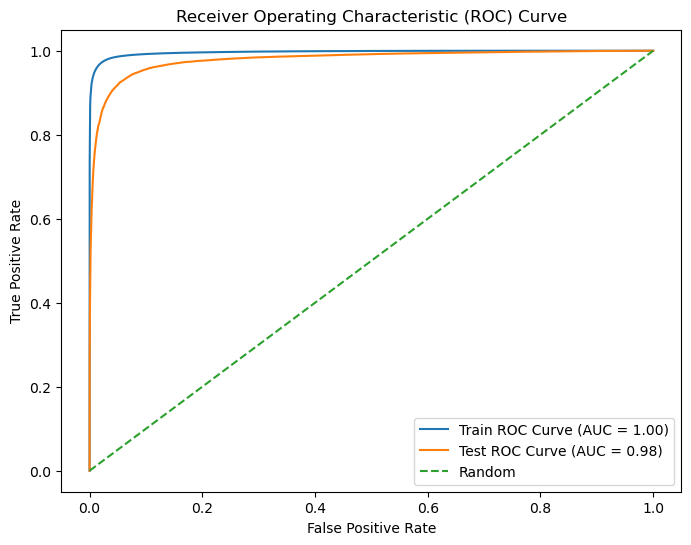

In [72]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for train and test sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, best_model_xg.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, best_model_xg.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = {:.2f})'.format(auc(fpr_train, tpr_train)))
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = {:.2f})'.format(auc(fpr_test, tpr_test)))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

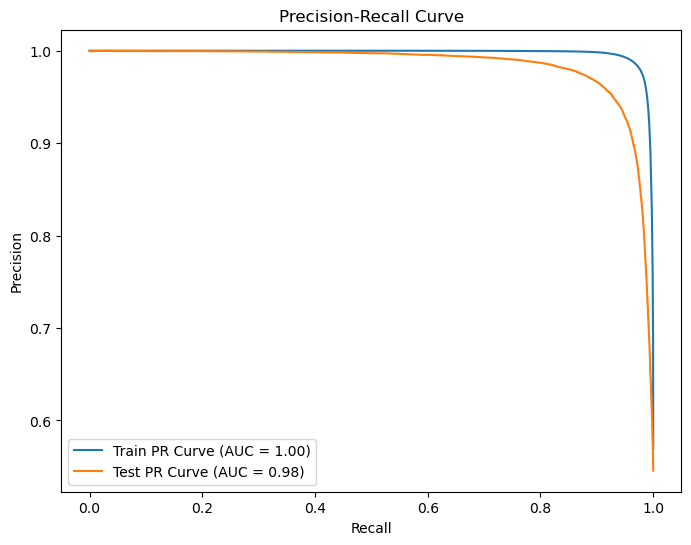

In [73]:
# Compute Precision-Recall curve for train and test sets
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, best_model_xg.predict_proba(X_train)[:, 1])
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, best_model_xg.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_train, precision_train, label='Train PR Curve (AUC = {:.2f})'.format(auc(recall_train, precision_train)))
plt.plot(recall_test, precision_test, label='Test PR Curve (AUC = {:.2f})'.format(auc(recall_test, precision_test)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

[0.09825276 0.0714165  0.43870813 0.3916226 ]


([<matplotlib.axis.XTick at 0x19688c250>,
 [Text(0, 0, 'State_Num'),
  Text(1, 0, 'City_Num'),
  Text(2, 0, 'EMPLOYER_num'),
  Text(3, 0, 'OCCUPATION_num')])

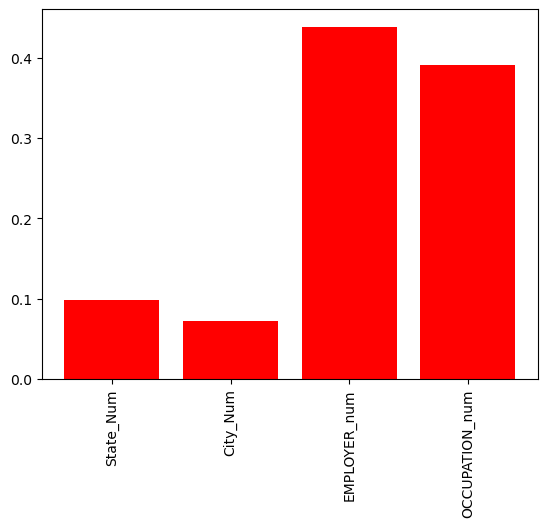

In [74]:
import matplotlib.pylab as plt

importances_xg_best = best_model_xg.steps[1][1].feature_importances_
print(importances_xg_best)

plt.bar(range(len(importances_xg_best)), importances_xg_best, color="r", align = "center")
plt.xticks(range(len(importances_xg_best)), ['State_Num', 'City_Num', 'EMPLOYER_num', 'OCCUPATION_num'], rotation = 90)